#### Import Dependencies

In [1]:
# Run Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#### Reading Dataframe

In [2]:
# Import datset
path = "Mall_Customers.csv"
df = pd.read_csv(path)

In [3]:
df.drop('CustomerID', axis=1, inplace=True)

#### Data Analysis and Exploration

In [4]:
#First 5 rolls
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
# Number of rolls and column in dataframe
df.shape

(200, 4)

In [6]:
# Missing Values?
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
# Description of data
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
# # Distribution of Data
# sns.distplot(customer_data['Annual Income (k$)'], label='Annual Income')
# sns.distplot(customer_data['Spending Score (1-100)'], label='Spending Score')
# plt.legend()
# plt.show()

In [10]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

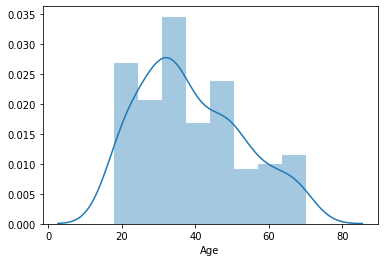

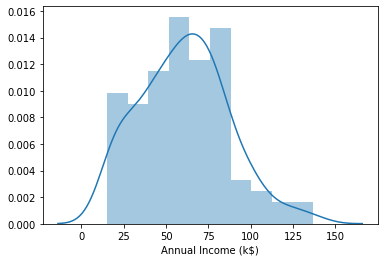

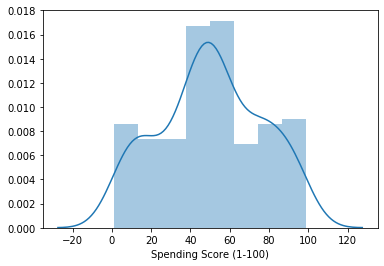

In [11]:
# Distribution plots for columns
for i in columns:
    plt.figure()
    sns.distplot(df[i], )

**The numerical variables all have a somewhat normal distribution apart from the "Spending Score (1-100)" which has more values between 40-60**

In [12]:
# for x in columns:
#     plt.figure()
#     sns.boxplot(data=df, x='Gender', y=df[x])

In [52]:
# Distribution of age ranges
under20 = df.Age[df['Age'] < 20]  
age20_30 = df.Age[(df.Age > 20) & (df.Age < 31)]
age30_40 = df.Age[(df.Age > 30) & (df.Age < 41)]
age40_50 = df.Age[(df.Age > 40) & (df.Age < 51)]
above50 = df.Age[df['Age'] > 50  ]

y = len(under20.values), len(age20_30.values), len(age30_40.values), len(age40_50.values), len(above50.values)
x = ["<20","20-30","31-40","41-50","50+"]

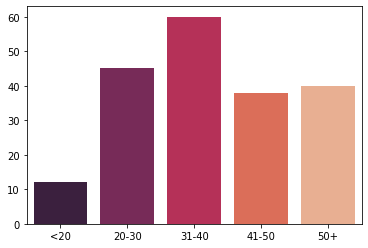

In [46]:
sns.barplot(y=y, x=x, palette='rocket')

In [108]:
# Distribution of Spending Score (1-100)

# Distribution of Spending Score ranges
score1_20 = df['Spending Score (1-100)'][df['Spending Score (1-100)'] < 21]  
score21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] > 20) & (df['Spending Score (1-100)'] < 31)]
score41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] > 41) & (df['Spending Score (1-100)'] < 60)]
score61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] > 61) & (df['Spending Score (1-100)'] < 80)]
score80_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] > 80)]

ssy = len(score1_20.values), len(score21_40.values), len(score41_60.values), len(score61_80.values), len(score80_100.values)
ssx = ["1-20","21-40","41-60","61-80","80+"]

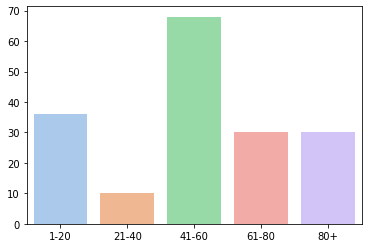

In [95]:
sns.barplot(y=ssy, x=ssx, palette='pastel')

In [114]:
# Distribution of Annual Income ranges
income25 = df['Annual Income (k$)'][df['Annual Income (k$)'] <= 26]  
income25_50 = df['Annual Income (k$)'][(df['Annual Income (k$)'] > 25) & (df['Annual Income (k$)'] < 50)]
income51_75 = df['Annual Income (k$)'][(df['Annual Income (k$)'] > 51) & (df['Annual Income (k$)'] < 75)]
income76_100 = df['Annual Income (k$)'][(df['Annual Income (k$)'] > 76) & (df['Annual Income (k$)'] < 100)]
income100 = df['Annual Income (k$)'][(df['Annual Income (k$)'] > 100)]

aiy = len(income25.values), len(income25_50.values), len(income51_75.values), len(income76_100.values), len(income100.values)
aix = ["1k - 25k","26k - 50k","51k - 75k","76k - 100k","100k+"]

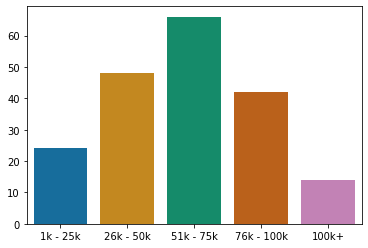

In [115]:
sns.barplot(x=aix,y=aiy, palette='colorblind')

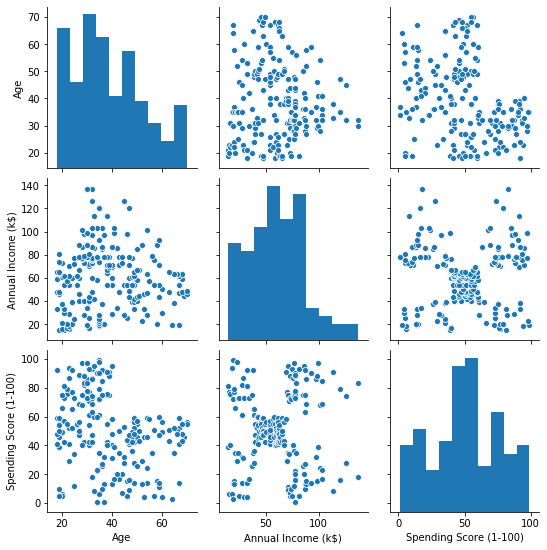

In [136]:
sns.pairplot(df)

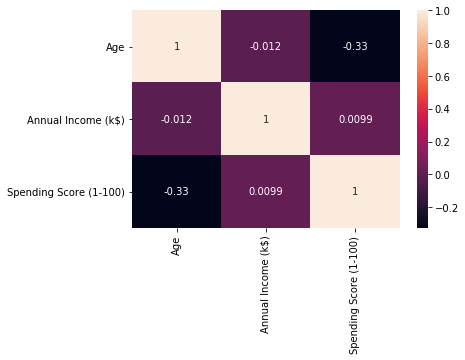

In [120]:
sns.heatmap(df.corr(), annot=True,)

#### Model Creation 

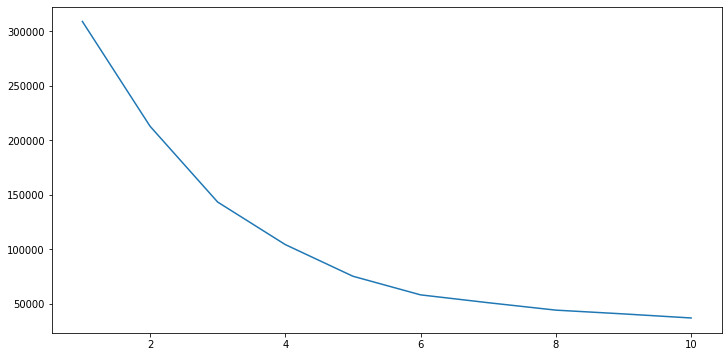

In [132]:
# Using Elbow Method to get Number of Clusters Needed
inertia_scores = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df.iloc[:,1:])
    inertia_scores.append(kmeans.inertia_)
plt.figure(figsize=(12,6)) 
plt.plot(range(1,11), inertia_scores)
#--- Then you look at the visual and determine where the elbow is, that would be your "n_clusters")

In [ ]:
# Gettiing values of Features
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']].values
# print(X)

In [ ]:
# Determining number of Clusters model would produce


In [133]:
df.iloc[:,2:]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
df['Gender'].value_counts(normalize=True)

In [ ]:
sns.pairplot(df, hue='Gender')

In [ ]:
df.groupby('Gender')[columns].mean()